# Test the best trained models with the new data
In both problems the best working network was the EfficientNet


In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

base_path = Path("E:/Users/joaor/NSP/2021")
if(Path().cwd() != Path(r"E:\Users\joaor\NSP\2021")):
    os.chdir(base_path)

data_dir = Path("Visibility_frames/")

In [2]:
transform = create_transform(transf_tensor=True,normalize=True)

base_path = Path("E:/Users/joaor/NSP/2021")
if(Path().cwd() != Path(r"E:\Users\joaor\NSP\2021")):
    os.chdir(base_path)

img = Image.open("Visibility_frames/Video_40_Good/Video_40_Good_1_frame160.png")
img = transform(img)

Load Model

In [9]:
def get_prediction_name(predicted_labels):
    predicted_label = torch.argmax(torch.softmax(predicted_labels, dim=1), dim=1)
    if(predicted_label == 0):
        return "Very Good"
    elif(predicted_label == 1):
        return "Good"
    elif(predicted_label == 2):
        return "Moderate"
    elif(predicted_label == 3):
        return "Poor"
    elif(predicted_label == 4):
        return "Very Poor"

In [4]:
change_to_disk()
device = get_device()
model_path = Path('Models_1/EfficientNetB0/EfficientNetB0_100_final.pth') 
model = EfficientNetB0
model = load_model(model,model_path,device)
model.eval()

EfficientNet(
  (pool): AdaptiveAvgPool2d(output_size=1)
  (features): Sequential(
    (0): CNNBlock(
      (cnn): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (silu): SiLU()
    )
    (1): InvertedResidualBlock(
      (conv): Sequential(
        (0): CNNBlock(
          (cnn): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (silu): SiLU()
        )
        (1): SqueezeExcitation(
          (se): Sequential(
            (0): AdaptiveAvgPool2d(output_size=1)
            (1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (2): SiLU()
            (3): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (4): Sigmoid()
          )
        )
        (2): Conv2d(32, 16, kernel_size=(1, 1), stride=(

In [7]:
def random_display_images_and_predicted_labels(images_path, model, n_images, transform):
    base_path = Path("E:/Users/joaor/NSP/2021")
    if(Path().cwd() != Path(r"E:\Users\joaor\NSP\2021")):
        os.chdir(base_path)
        
    random_image_paths = random.sample(list(data_dir.glob("*/*.png")), k=n_images)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            img = transform(f)
            pred_label = model(img.unsqueeze(dim=0))
            label = get_prediction_name(pred_label)
            plt.figure(figsize=(5,4))
            plt.imshow(f)
            plt.title(f"Predicted label: {label}")

In [4]:
def display_one_image_label(image_path, model, transform, real_label):
    
    base_path = Path("E:/Users/joaor/NSP/2021")
    if(Path().cwd() != Path(r"E:\Users\joaor\NSP\2021")):
        os.chdir(base_path)

    f = Image.open(image_path)
    img = transform(f)
    pred_labels = model(img.unsqueeze(dim=0))
    label = get_prediction_name(pred_labels)
    plt.figure(figsize=(5,4))
    plt.imshow(f)
    plt.title(f"Predicted label: {label}")
    plt.suptitle(f"Real label: {real_label}")

In [35]:
torch.cuda.empty_cache()

Display a Very Good/Good Visibility Image and predicted label

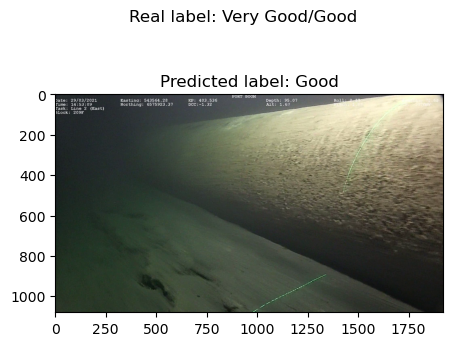

In [27]:
display_one_image_label("Visibility_frames/Video_15_Poor/Video_15_Poor_1_frame3100.png", model, transform, "Very Good/Good")

Display a Good/Moderate Visibility Image and predicted label

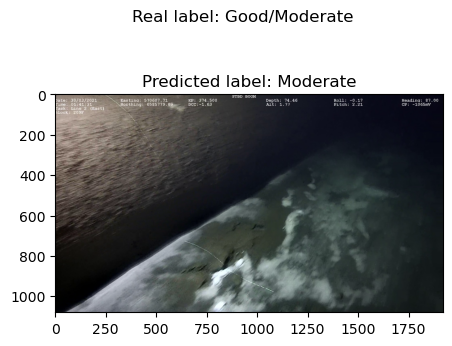

In [26]:
display_one_image_label("Visibility_frames/Video_37_Good/Video_37_Good_2_frame8500.png", model, transform, "Good/Moderate")

Display a Moderate/Poor Visibility Image and predicted label

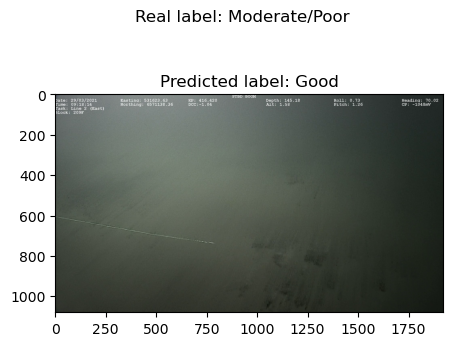

In [34]:
display_one_image_label("Visibility_frames/Video_5_Poor/Video_5_Poor_2_frame1000.png", model, transform, "Moderate/Poor")

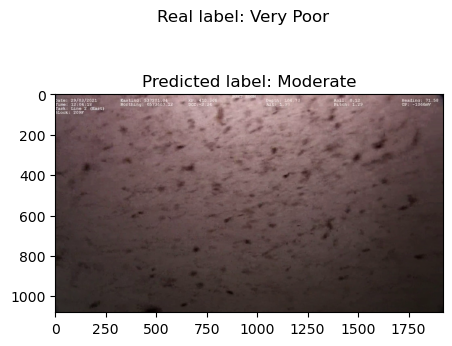

In [33]:
display_one_image_label("Visibility_frames/Video_10_Poor/Video_10_Poor_0_frame30636.png", model, transform, "Very Poor")

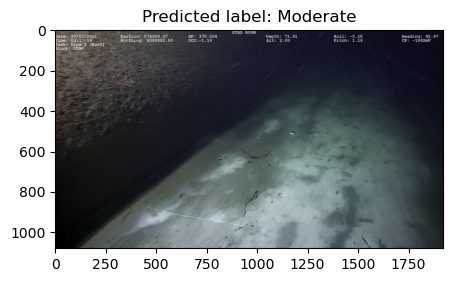

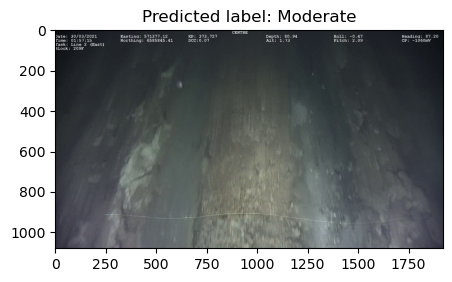

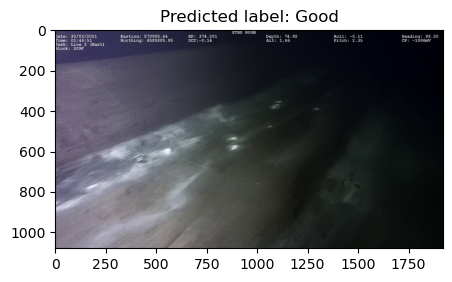

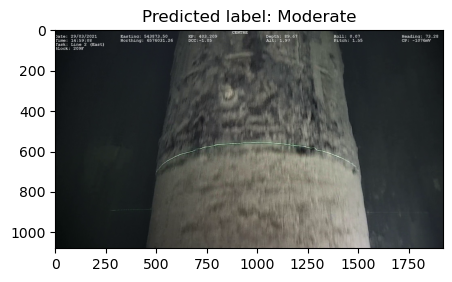

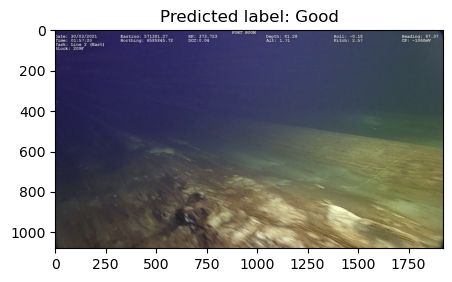

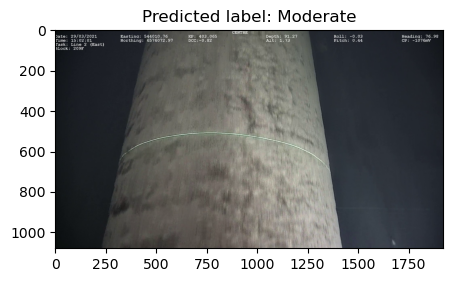

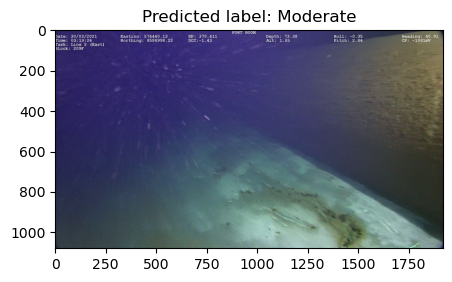

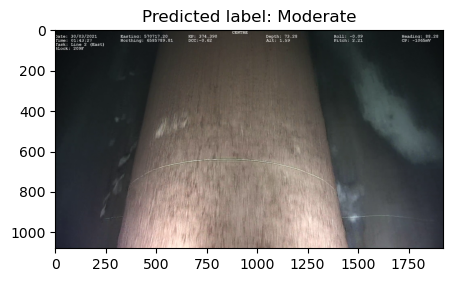

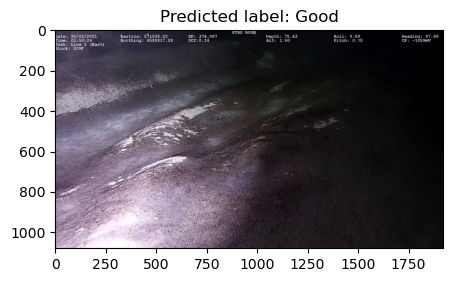

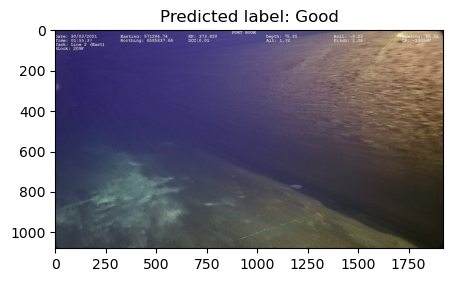

In [11]:
random_display_images_and_predicted_labels(data_dir, model, 10, transform)

Test new model with the same data

In [24]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

In [30]:
change_to_disk()
device = get_device()
model_path = Path('best_model/EfficientNetB0/EfficientNetB0_87_100_epcs.pth') 
model = EfficientNetB0
model = load_model(model,model_path,device)
model.eval()

transform = create_transform(transf_tensor=True,normalize=True)
print('Done')

Done


In [31]:
def display_one_image_label(image_path, model, transform, real_label):
    
    base_path = Path("E:/Users/joaor/NSP/2021")
    if(Path().cwd() != Path(r"E:\Users\joaor\NSP\2021")):
        os.chdir(base_path)

    f = Image.open(image_path)
    img = transform(f)
    pred_labels = model(img.unsqueeze(dim=0))
    label = get_prediction_name(pred_labels)
    plt.figure(figsize=(5,4))
    plt.imshow(f)
    plt.title(f"Predicted label: {label}")
    plt.suptitle(f"Real label: {real_label}")

def get_prediction_name(predicted_labels):
    predicted_label = torch.argmax(torch.softmax(predicted_labels, dim=1), dim=1)
    if(predicted_label == 0):
        return "Very Good"
    elif(predicted_label == 1):
        return "Good"
    elif(predicted_label == 2):
        return "Moderate"
    elif(predicted_label == 3):
        return "Poor"
    elif(predicted_label == 4):
        return "Very Poor"

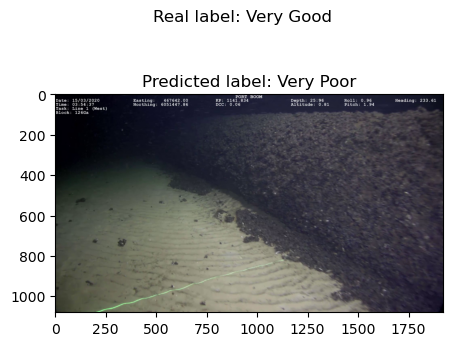

In [28]:
display_one_image_label("new_split_1k/test/1_Very_Good/Vis_Vgood_1_0_frame191.png", model, transform, "Very Good")

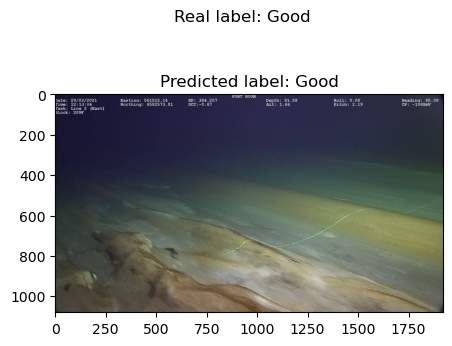

In [16]:
display_one_image_label("Visibility_levels_test/2_Good/Video_31_Good_0_frame1886.png", model, transform, "Good")
#"E:\Users\joaor\NSP\2021\Visibility_levels_test\2_Good\Video_31_Good_0_frame1886.png"

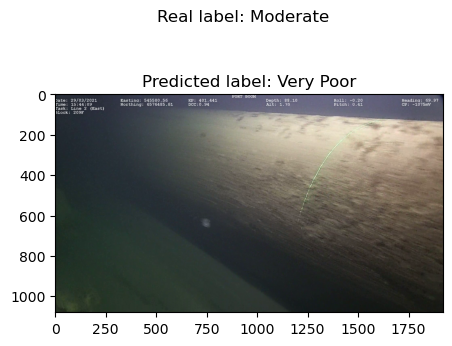

In [23]:
display_one_image_label("Visibility_levels_test/3_Moderate/Video_18_Good_0_frame6510.png", model, transform, "Moderate")

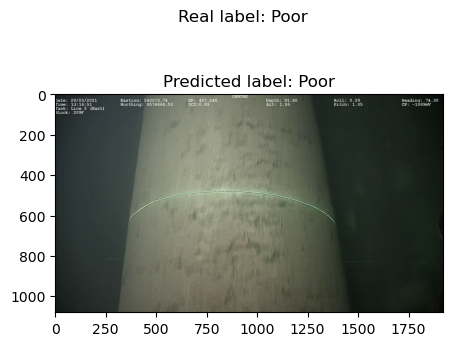

In [20]:
display_one_image_label("Visibility_levels_test/4_Poor/Video_13_Poor_1_frame7906.png", model, transform, "Poor")

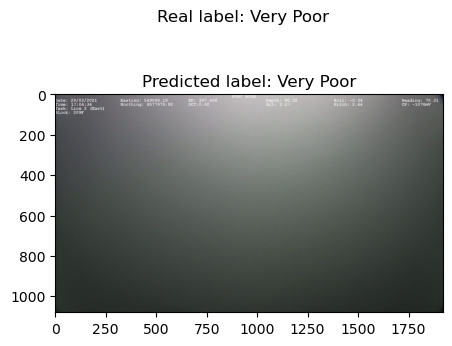

In [19]:
display_one_image_label("Visibility_levels_test/5_Very_Poor/Video_20_Moderate_0_frame43205.png", model, transform, "Very Poor")